In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io

# M132A HW5 (code)

9.4 b) From our work in part a we have 

$\nabla f(\mathbf{x}) = [-200(x_2 - x_1)^2 + (1 - x_1)^2, 200(x_2 - x_1)]$

$\mathbf{F}(\mathbf{x}) = \begin{bmatrix}
        202 & -200 \\ -200 & 200
    \end{bmatrix}$

Thus we can directly calculate the inverse of the hessian 

$\mathbf{F}^{-1}(\mathbf{x}) = \begin{bmatrix}
        1/2 & 1/2 \\ 1/2 & 101/200
    \end{bmatrix}$

In [ ]:
# create function for Newton's method
def Newtons_Method_quad(x0, f, grad, hess, tol, max_iter):
    '''
    Performs Newton's method to find the minimizer of a function
    NOTE: This function is specifically for quadratic objective functions
    Inputs:
    x0 - initial guess
    f - objective function
    grad - gradient of the objective function
    hess - the inverse of the hessian of the objective function (since we are assuming the objective function is quadratic)
    tol - tolerance for stopping criteria
    max_iter - number of iterations of max iterations allowed 
    inv - the function 
    Output:
    x - minimizer
    data - table of data by iteration
    '''
    # initialize variables 
    x = x0
    iter = 0

    data = pd.DataFrame(columns = ['k', 'x_k', 'f(x)', 'grad(x)'])

    # iterate Newton's method 
    while iter <= max_iter: 
        old_x = x 
        fx = f(x)
        grad_x = grad(x)
        hess_x = hess(x)
        data.loc[iter] = [iter, x, fx, grad_x]
        iter += 1
        x = x - np.dot(hess_x, grad_x)
        if np.linalg.norm(x - old_x) < tol:
            break
    return x, data 

In [6]:
# initalize values
x0 = np.array([0, 0])
f = lambda x: 100 * (x[1] - x[0])**2 + (1 - x[0])**2
grad = lambda x: np.array([202 * x[0] - 200 * x[1] - 2, 200 * x[1] - 200 * x[0]])
hess = lambda x: np.array([[202, -200], [-200, 200]])

# run Newton's method for two iterations
minimizer, data = Newtons_Method_quad(x0, f, grad, hess, tol = 1e-6, max_iter = 2)

In [8]:
print(f'The approximate minimizer is [{minimizer[0]:.2f},{minimizer[1]:.2f}]')
data

The approximate minimizer is [10420614578828.00,-10368641762800.00]


,k,x_k,f(x),grad(x)
0,0,"[0, 0]",1,"[-2, 0]"
1,1,"[404, -400]",64804009,"[161606, -160800]"
2,2,"[-64804008, 64480800]",1675655717542158481,"[-25986569618, 25856961600]"


c) Repeating the steps in part b instead with a gradient algorithm and a fixed step size $\alpha_k = 0.05$

In [9]:
# create a function for fixed-step gradient descent
def gradient_descent(x0, f, grad, step_size, tol, max_iter):
    '''
    Performs gradient descent to find the minimizer of a function
    NOTE: This function is specifically for quadratic objective functions
    Inputs:
    x0 - initial guess
    f - objective function
    grad - gradient of the objective function
    step_size - step size for gradient descent
    tol - tolerance for stopping criteria
    max_iter - number of iterations of max iterations allowed 
    Output:
    x - minimizer
    data - table of data by iteration
    '''
    # initialize variables 
    x = x0
    iter = 0

    data = pd.DataFrame(columns = ['k', 'x_k', 'f(x)', 'grad(x)'])

    # iterate gradient descent
    while iter <= max_iter: 
        old_x = x 
        fx = f(x)
        grad_x = grad(x)
        data.loc[iter] = [iter, x, fx, grad_x]
        iter += 1
        x = x - step_size * grad_x
        if np.linalg.norm(x - old_x) < tol:
            break
    return x, data

In [10]:
# can use same values from part b
minimizer, data = gradient_descent(x0, f, grad, step_size = 0.05, tol = 1e-6, max_iter = 2)

In [11]:
print(f'The approximate minimizer is [{minimizer[0]:.2f},{minimizer[1]:.2f}]')
data

The approximate minimizer is [17.47,-17.10]


,k,x_k,f(x),grad(x)
0,0,"[0, 0]",1.0000,"[-2, 0]"
1,1,"[0.1, 0.0]",1.8100,"[18.200000000000003, -20.0]"
2,2,"[-0.8100000000000002, 1.0]",330.8861,"[-365.62, 362.0]"


11.5 Minimizing the function $f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^T\begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix}\mathbf{x} - \mathbf{x}^T\begin{bmatrix} 1 \\ -1\end{bmatrix} + 7$

In [2]:
def descent_alg(f, g, x0, H0, tol = 1e-6):
    '''
    Performs descent algorithm to minimize an obective function
    Inputs:
    * f - objective function
    * g - gradient of the objective function
    * x0 - initial guess
    * H0 - initial guess for hessian matrix
    * tol - tolerance level for stopping 
    Ouput:
    * x - minimizer
    '''
    # initialize values
    x = x0 
    H = H0
    k = 0 # optional, may include table displaying data
    while True:
        fx = f(x)
        gx = g(x)
        if gx == 0:
            break
        else:
            dx = -1 * H @ gx
        f_temp = lambda a: fx - (a * dx) 
        # WIP write function to calculate optimal alpha value 
        # or add fixed step for alpha
        a = 1 # will change when line search minimization is added
        x_new = x + (a * dx)
        if np.linalg.norm(x - x_new) < tol:
            x = x_new 
            break
        delta_x = a * dx
        delta_gx = g(x_new) - g(x)
        H = H + (np.outer(delta_x - H @ delta_gx, delta_x - H @ delta_gx) / np.inner(delta_gx, delta_x - H @ delta_gx))
        x = x_new
        k += 1
    return x       

26.3 a) Downloading image and calculting C

In [9]:
# loading the image
image = scipy.io.loadmat('building256.mat')['building256']

# normalize image
X = image / 255

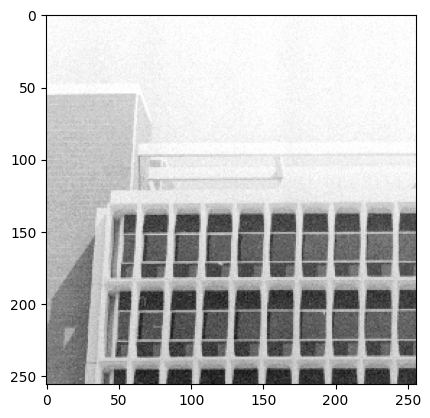

In [10]:
plt.imshow(X, cmap='gray')
plt.show()

In [15]:
# calculate C = X @ X.T
C = X @ X.T

b) Computing five largest eigenvalues and their associated eigenvectors

In [21]:
# computing eigenvalues and eigenvectors for C
eigenvals, eigenvecs = np.linalg.eig(C)

# extract the five largest eigenvalues and their corresponding eigenvectors
top_5_eigenvals = eigenvals[:5]
top_5_eigenvecs = eigenvecs[:, :5]

c) Computing $\mathbf{v}_i = \frac{\mathbf{X}^T \mathbf{u}_i}{\sqrt{\lambda_i}}$ for i = 1, 2, 3, 4, 5

In [51]:
# computing vectors 
vectors = [(X.T @ top_5_eigenvecs[:, i]/ np.sqrt(top_5_eigenvals[i])) for i in range(5)]

In [53]:
vectors[0].shape

(256,)

d) Use results from parts b and c to construct $X_k = \sum_{i=1}^k \sqrt{\lambda_i}\mathbf{u}_i\mathbf{v}_i^T$

In [66]:
XK = dict()
X_k = np.zeros_like(C)
for i in range(5):
    lambda_i = top_5_eigenvals[i]
    u_i = top_5_eigenvecs[:, i]
    v_i = vectors[i]
    X_k = X_k +  (np.sqrt(lambda_i) * np.outer(u_i, v_i))
    XK[i] = X_k


d) Computing the relative approximation errors

In [67]:
errors = np.zeros(5)
for i in range(5):
    errors[i] = np.linalg.norm(X - XK[i], ord = 'fro') / np.linalg.norm(X, ord = 'fro')
errors

array([0.17416455, 0.11450362, 0.08276849, 0.07126731, 0.06482539])

f) Comparing different rank approximations to the original photo

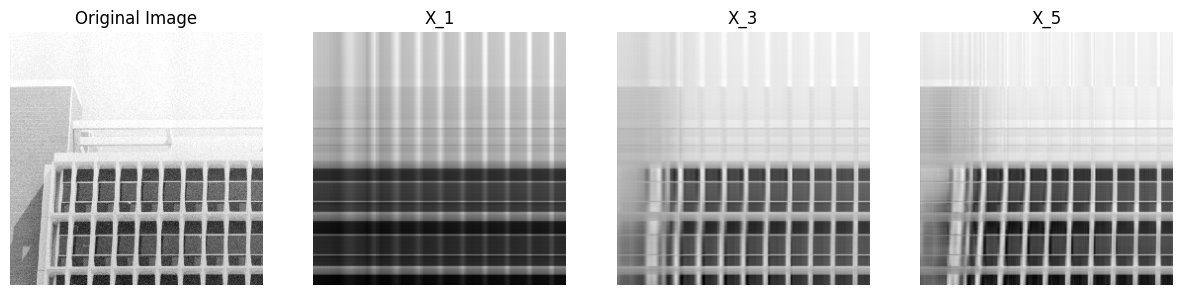

In [ ]:
# create subplots to compare X_1, X_3, and X_5 to X
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(X, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(XK[0], cmap='gray')
axs[1].set_title('Rank 1 Approximation')
axs[1].axis('off')
axs[2].imshow(XK[2], cmap='gray')
axs[2].set_title('Rank 3 Approximation')
axs[2].axis('off')
axs[3].imshow(XK[4], cmap='gray')
axs[3].set_title('Rank 5 Approximation')
axs[3].axis('off')
plt.show()

g) It should require about $5 * (256 + 256) = 2560$ numbers to store `X5`, therefore the compression ratio is $256^2 / 2560 = 25.6$.